### Gaussian Processes Practical Demonstration
https://www.youtube.com/watch?v=V1bF37-_ytQ

In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
# Importing data library
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processess libary
import GPy
from IPython.display import display

In [2]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI1")

In [3]:
# Menampilkan 5 Data pertama DKI1
DKI1

Tanggal             Wilayah      PM10       SO2        CO        O3  \
0    2017-01-01  DKI1 (Bunderan HI)  0.719512  0.314286  0.458333  0.092308   
1    2017-01-02  DKI1 (Bunderan HI)  0.146341  0.295238  0.270833  0.082051   
2    2017-01-03  DKI1 (Bunderan HI)  0.170732  0.295238  0.291667  0.087179   
3    2017-01-04  DKI1 (Bunderan HI)  0.243902  0.295238  0.395833  0.087179   
4    2017-01-05  DKI1 (Bunderan HI)  0.304878  0.295238  0.458333  0.056410   
...         ...                 ...       ...       ...       ...       ...   
1760 2021-10-27  DKI1 (Bunderan HI)  0.621951  0.266667  0.250000  0.097436   
1761 2021-10-28  DKI1 (Bunderan HI)  0.573171  0.257143  0.270833  0.097436   
1762 2021-10-29  DKI1 (Bunderan HI)  0.560976  0.285714  0.333333  0.076923   
1763 2021-10-30  DKI1 (Bunderan HI)  0.536585  0.285714  0.187500  0.112821   
1764 2021-10-31  DKI1 (Bunderan HI)  0.597561  0.247619  0.166667  0.148718   

           NO2       Max Critical Kategori  
0     0.012821  0.300518     PM10   Sedang  
1     0.000000  0.139896      SO2     Baik  
2     0.012821  0.139896      SO2     Baik  
3     0.012821  0.139896      SO2     Baik  
4     0.012821  0.139896      SO2     Baik  
...        ...       ...      ...      ...  
1760  0.487179  0.367876     PM25   SEDANG  
1761  0.487179  0.331606     PM25   SEDANG  
1762  0.435897  0.305699     PM25   SEDANG  
1763  0.500000  0.326425     PM25   SEDANG  
1764  0.397436  0.336788     PM25   SEDANG  

[1765 rows x 10 columns]

Train Test Data

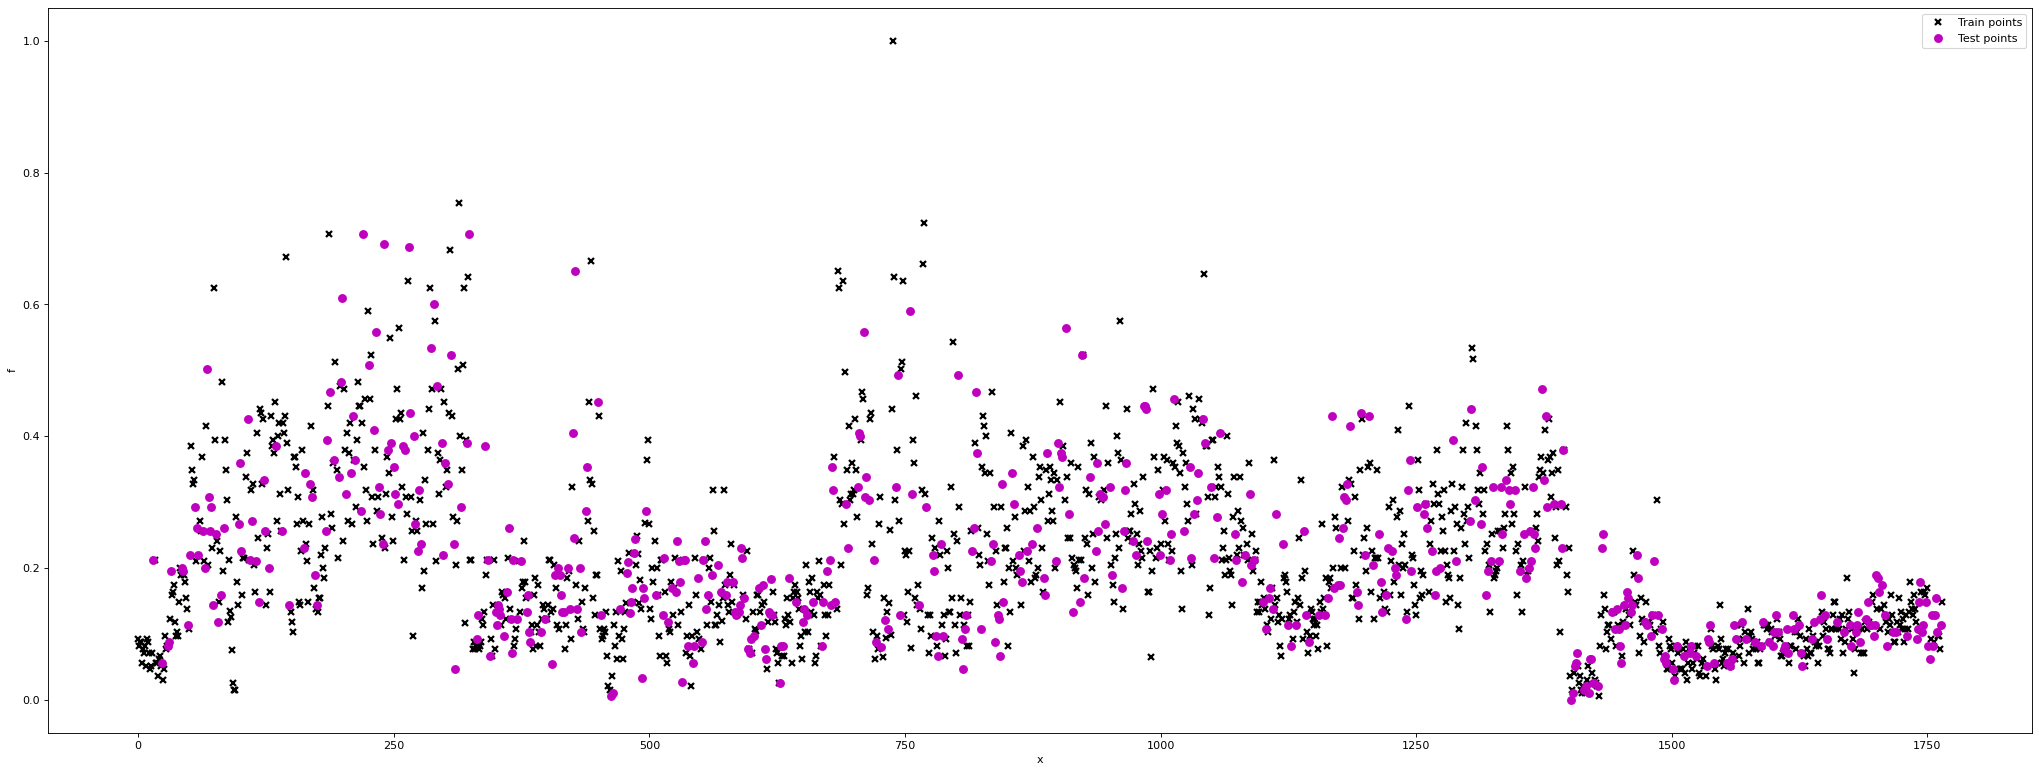

In [4]:
X = np.array(list(range(0,1765)))
# x = np.array(DKI1['Tanggal'])
X = X.reshape(-1,1)
Y = np.array(DKI1['O3'])
Y = Y.reshape(-1,1)

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(train_X, train_Y, "kx", mew=2, label='Train points')
plt.plot(test_X, test_Y, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend()

#### RBF Kernel
Optimizing kernel parameters

In [5]:
k1 = GPy.kern.RBF(1)
m1 = GPy.models.GPRegression(train_X, train_Y, k1)
m1.optimize()

In [6]:
m1

In [7]:
plt.rc('figure', figsize=(64, 24), dpi=240)
m1.plot()
ax = plt.gca()
ax.plot(test_X, test_Y, "mo", mew=2, label="Test points")

ax.legend()

In [8]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [9]:
print('Evaluation:\n_____________________________________')
print_evaluate(test_Y, m1.predict(test_X)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.06376029395895656
MSE: 0.008216260472415348
RMSE: 0.09064359035483617
R2 Square 0.48645526593539257
__________________________________


Periodic kernel

In [10]:
k2 = GPy.kern.StdPeriodic(1, period=2)
m2 = GPy.models.GPRegression(train_X, train_Y, k2)
m2.optimize()

In [11]:
m2

In [12]:
m2.plot()
ax = plt.gca()
plt.rc('figure', figsize=(64, 24), dpi=240)
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

In [13]:
print('Evaluation:\n_____________________________________')
print_evaluate(test_Y, m2.predict(test_X)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.0952547342706153
MSE: 0.015318374327592714
RMSE: 0.1237674202994985
R2 Square 0.04254855395874135
__________________________________


Kombinasi 2 Kernel

In [14]:
k3 = k1+k2
k4 = k1*k2

In [15]:
m3 = GPy.models.GPRegression(train_X, train_Y, k3)
m3.optimize()
m3

In [16]:
m3.plot()
ax = plt.gca()
plt.rc('figure', figsize=(64, 24), dpi=240)
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

In [17]:
print('Evaluation:\n_____________________________________')
print_evaluate(test_Y, m3.predict(test_X)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.06131562828036679
MSE: 0.008140655462930845
RMSE: 0.09022558097862737
R2 Square 0.4911808408633084
__________________________________


In [18]:
m4 = GPy.models.GPRegression(train_X, train_Y, k4)
m4.optimize()
m4

In [19]:
m4.plot()
ax = plt.gca()
plt.rc('figure', figsize=(64, 24), dpi=240)
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

In [20]:
print('Evaluation:\n_____________________________________')
print_evaluate(test_Y, m4.predict(test_X)[0].flatten())

Evaluation:
_____________________________________
MAE: 0.06376029818841629
MSE: 0.008216300568746221
RMSE: 0.0906438115303313
R2 Square 0.48645275977585145
__________________________________
